<a href="https://colab.research.google.com/github/Adhokshaj04/weather_predict/blob/main/weather_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Weather or Not**


# *Importing Libraries and reading data*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import mean_absolute_error

In [ ]:
weather = pd.read_excel('climateData_ROC.xlsx', index_col="DATE")

In [ ]:
weather

,STATION,NAME,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WESD,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-02-19,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,11.86,1413.0,1810.0,0.00,1.0,4.0,18.0,26.0,9.0,240.0,280.0,0.3,23.0,28.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2005-02-20,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,8.05,1938.0,1913.0,0.01,1.8,4.0,19.0,26.0,11.0,90.0,100.0,0.4,17.9,23.9,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2005-02-21,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,7.83,1031.0,936.0,0.06,1.9,6.0,31.0,36.0,26.0,250.0,240.0,0.6,17.9,23.9,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0
2005-02-22,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,6.71,1158.0,2214.0,0.04,2.5,5.0,30.0,34.0,26.0,250.0,330.0,0.5,15.0,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
2005-02-23,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,8.05,1459.0,1459.0,0.00,0.5,6.0,19.0,26.0,12.0,280.0,280.0,1.0,16.1,17.9,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-15,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,8.28,NaN,NaN,0.24,2.4,3.1,24.0,30.0,21.0,130.0,130.0,NaN,14.1,19.9,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-02-16,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,13.42,NaN,NaN,0.47,2.3,3.9,29.0,32.0,20.0,20.0,290.0,NaN,25.9,35.1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-02-17,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,21.03,NaN,NaN,0.11,3.7,7.9,20.0,21.0,12.0,270.0,280.0,NaN,36.9,52.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# *Preprocessing and EDA*

In [ ]:
# Computing the percentage of null values in each column
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

,0
STATION,0.000000
NAME,0.000000
AWND,0.000821
FMTM,0.661237
PGTM,0.669860
PRCP,0.000137
SNOW,0.000274
SNWD,0.000137
TAVG,0.404188
TMAX,0.000137


In [ ]:
# identifying columns which have less than 5% null values to keep.
valid_columns = weather.columns[null_pct < 0.05]
valid_columns

Index(['STATION', 'NAME', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2',
       'WSF5'],
      dtype='object')

In [ ]:
weather = weather[valid_columns].copy()

In [ ]:
weather.columns = weather.columns.str.lower()
weather

,station,name,awnd,prcp,snow,snwd,tmax,tmin,wdf2,wdf5,wsf2,wsf5
DATE,,,,,,,,,,,,
2005-02-19,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,11.86,0.00,1.0,4.0,26.0,9.0,240.0,280.0,23.0,28.0
2005-02-20,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,8.05,0.01,1.8,4.0,26.0,11.0,90.0,100.0,17.9,23.9
2005-02-21,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,7.83,0.06,1.9,6.0,36.0,26.0,250.0,240.0,17.9,23.9
2005-02-22,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,6.71,0.04,2.5,5.0,34.0,26.0,250.0,330.0,15.0,17.0
2005-02-23,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,8.05,0.00,0.5,6.0,26.0,12.0,280.0,280.0,16.1,17.9
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-15,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,8.28,0.24,2.4,3.1,30.0,21.0,130.0,130.0,14.1,19.9
2025-02-16,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,13.42,0.47,2.3,3.9,32.0,20.0,20.0,290.0,25.9,35.1
2025-02-17,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,21.03,0.11,3.7,7.9,21.0,12.0,270.0,280.0,36.9,52.1


In [ ]:
# forwardfilling to  avoid having any missing values in our column
weather = weather.ffill()

In [ ]:
weather.apply(pd.isnull).sum()

,0
station,0
name,0
awnd,0
prcp,0
snow,0
snwd,0
tmax,0
tmin,0
wdf2,0
wdf5,0


In [ ]:
#checking if all the data in the columns we have are correctly identified as the right datatype
weather.dtypes

,0
station,object
name,object
awnd,float64
prcp,float64
snow,float64
snwd,float64
tmax,float64
tmin,float64
wdf2,float64
wdf5,float64


In [ ]:
#checking if all the data in the row is correctly identified as the right datatype
weather.index

DatetimeIndex(['2005-02-19', '2005-02-20', '2005-02-21', '2005-02-22', '2005-02-23', '2005-02-24',
               '2005-02-25', '2005-02-26', '2005-02-27', '2005-02-28',
               ...
               '2025-02-10', '2025-02-11', '2025-02-12', '2025-02-13', '2025-02-14', '2025-02-15',
               '2025-02-16', '2025-02-17', '2025-02-18', '2025-02-19'],
              dtype='datetime64[ns]', name='DATE', length=7306, freq=None)

In [ ]:
# to convert date to datetime data type to make model training easier
weather.index = pd.to_datetime(weather.index)
weather.index

DatetimeIndex(['2005-02-19', '2005-02-20', '2005-02-21', '2005-02-22', '2005-02-23', '2005-02-24',
               '2005-02-25', '2005-02-26', '2005-02-27', '2005-02-28',
               ...
               '2025-02-10', '2025-02-11', '2025-02-12', '2025-02-13', '2025-02-14', '2025-02-15',
               '2025-02-16', '2025-02-17', '2025-02-18', '2025-02-19'],
              dtype='datetime64[ns]', name='DATE', length=7306, freq=None)

In [ ]:
# to show that we do not have any gaps in our 2 decades worth of data
weather.index.year.value_counts().sort_index()

,count
DATE,
2005,316
2006,365
2007,365
2008,366
2009,365
2010,365
2011,365
2012,366
2013,365


<Axes: xlabel='DATE'>

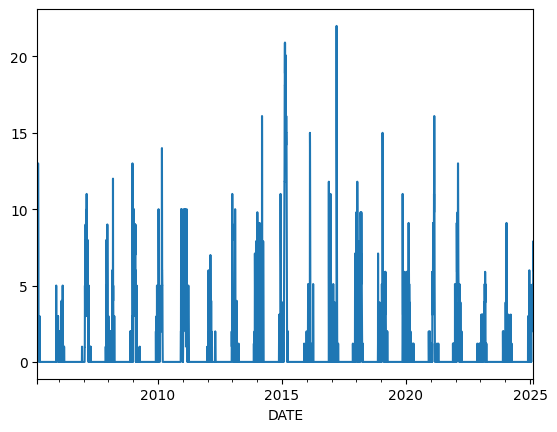

In [ ]:
# bar plot to show how much snow has accumulated in the past 2 decades
weather["snwd"].plot()

<Axes: xlabel='DATE'>

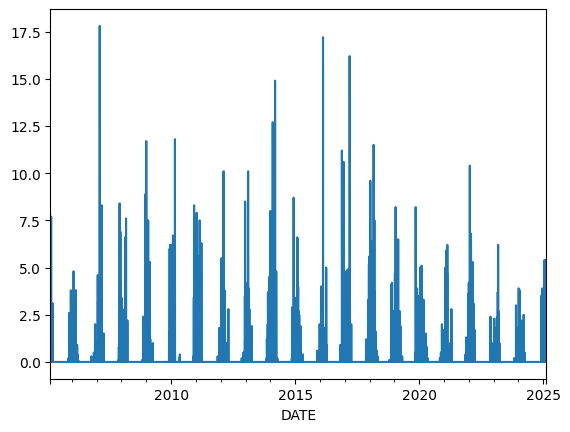

In [ ]:
# bar plot to display the snowfall in 2 decades
weather["snow"].plot()

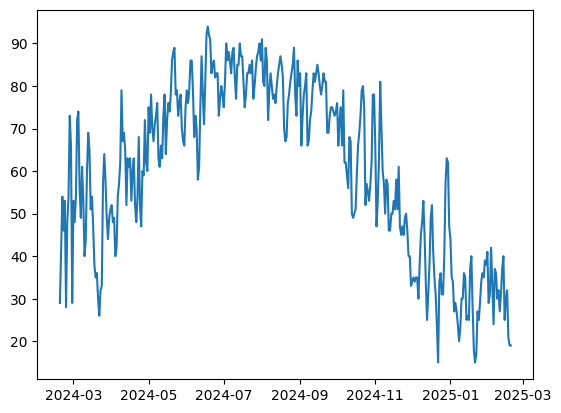

In [ ]:
# max temperature over the last year
last_year = weather[weather.index >= (weather.index.max() - pd.DateOffset(years=1))]
plt.plot(last_year.index, last_year['tmax'])
plt.show()

In [ ]:
weather.head()

,station,name,awnd,prcp,snow,snwd,tmax,tmin,wdf2,wdf5,wsf2,wsf5
DATE,,,,,,,,,,,,
2005-02-19,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,11.86,0.00,1.0,4.0,26.0,9.0,240.0,280.0,23.0,28.0
2005-02-20,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,8.05,0.01,1.8,4.0,26.0,11.0,90.0,100.0,17.9,23.9
2005-02-21,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,7.83,0.06,1.9,6.0,36.0,26.0,250.0,240.0,17.9,23.9
2005-02-22,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,6.71,0.04,2.5,5.0,34.0,26.0,250.0,330.0,15.0,17.0
2005-02-23,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,8.05,0.00,0.5,6.0,26.0,12.0,280.0,280.0,16.1,17.9


In [ ]:
# Dropping columns that are non-essentail for weather prediction
weather = weather.drop(columns=["wdf2", "wdf5", "wsf2", "wsf5"])

In [ ]:
# to predict tommorows tmax(maximum weather), we make a target column which contains the next day's tmax values
weather["target"] = weather.shift(-1)["tmax"]
weather

,station,name,awnd,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,,
2005-02-19,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,11.86,0.00,1.0,4.0,26.0,9.0,26.0
2005-02-20,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,8.05,0.01,1.8,4.0,26.0,11.0,36.0
2005-02-21,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,7.83,0.06,1.9,6.0,36.0,26.0,34.0
2005-02-22,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,6.71,0.04,2.5,5.0,34.0,26.0,26.0
2005-02-23,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,8.05,0.00,0.5,6.0,26.0,12.0,21.0
...,...,...,...,...,...,...,...,...,...
2025-02-15,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,8.28,0.24,2.4,3.1,30.0,21.0,32.0
2025-02-16,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,13.42,0.47,2.3,3.9,32.0,20.0,21.0
2025-02-17,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,21.03,0.11,3.7,7.9,21.0,12.0,19.0


In [ ]:
# to fill the missing value for the latest weather date i.e., feb 19th 2025 in this case
weather = weather.ffill()
weather

,station,name,awnd,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,,
2005-02-19,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,11.86,0.00,1.0,4.0,26.0,9.0,26.0
2005-02-20,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,8.05,0.01,1.8,4.0,26.0,11.0,36.0
2005-02-21,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,7.83,0.06,1.9,6.0,36.0,26.0,34.0
2005-02-22,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,6.71,0.04,2.5,5.0,34.0,26.0,26.0
2005-02-23,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,8.05,0.00,0.5,6.0,26.0,12.0,21.0
...,...,...,...,...,...,...,...,...,...
2025-02-15,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,8.28,0.24,2.4,3.1,30.0,21.0,32.0
2025-02-16,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,13.42,0.47,2.3,3.9,32.0,20.0,21.0
2025-02-17,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,21.03,0.11,3.7,7.9,21.0,12.0,19.0


# *Preparing data for ML*

# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=0.1)

In [ ]:
# looking for predictors that are not in the list mentioned below
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]
predictors

Index(['awnd', 'prcp', 'snow', 'snwd', 'tmax', 'tmin'], dtype='object')

In [ ]:
# making predictions every 90 days for the last 10 years
def backtest(weather, model, predictors, start=3650, step=90):
  all_predictions = []
  for i in range(start, weather.shape[0], step):
    train = weather.iloc[:i,:]
    test = weather.iloc[i:(i+step)]

    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])  # returns a numpy array
    preds = pd.Series(preds, index=test.index) # converting the numpy array to panda series(easier to use)


    preds - pd.Series(preds, index=test.index)
    combined = pd.concat([test["target"], preds], axis=1) # to treat every column as a seperate column
    combined.columns = ["actual", "prediction"]

    combined["diff"] = (combined["prediction"] - combined["actual"]).abs()

    all_predictions.append(combined)
  return pd.concat(all_predictions)

In [ ]:
predictions = backtest(weather, rr, predictors)
predictions

,actual,prediction,diff
DATE,,,
2015-02-17,22.0,22.398096,0.398096
2015-02-18,14.0,25.251329,11.251329
2015-02-19,6.0,12.120133,6.120133
2015-02-20,23.0,8.921560,14.078440
2015-02-21,29.0,24.980044,4.019956
...,...,...,...
2025-02-15,32.0,33.348264,1.348264
2025-02-16,21.0,29.442615,8.442615
2025-02-17,19.0,14.357014,4.642986


In [ ]:
# Predicting the accuracy of our model
mean_absolute_error(predictions["actual"], predictions["prediction"])

5.984876966803224

In [ ]:
# finding the average of the past few days to get a better accuracy
def pct_diff(old, new):
  return (new - old) / old

def compute_rolling(weather, horizon, col):
  label = f"rolling_{horizon}_{col}"

  weather[label] = weather[col].rolling(horizon).mean()
  weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
  return weather

rolling_horizons = [3,14]

for horizon in rolling_horizons:
  for col in ["tmax", "tmin", "prcp"]:
    weather = compute_rolling(weather, horizon, col)


In [ ]:
weather

,station,name,awnd,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,,
2005-02-19,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,11.86,0.00,1.0,4.0,26.0,9.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-02-20,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,8.05,0.01,1.8,4.0,26.0,11.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-02-21,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,7.83,0.06,1.9,6.0,36.0,26.0,34.0,29.333333,0.227273,15.333333,0.695652,0.023333,1.571429,NaN,NaN,NaN,NaN,NaN,NaN
2005-02-22,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,6.71,0.04,2.5,5.0,34.0,26.0,26.0,32.000000,0.062500,21.000000,0.238095,0.036667,0.090909,NaN,NaN,NaN,NaN,NaN,NaN
2005-02-23,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,8.05,0.00,0.5,6.0,26.0,12.0,21.0,32.000000,-0.187500,21.333333,-0.437500,0.033333,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-15,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,8.28,0.24,2.4,3.1,30.0,21.0,32.0,31.666667,-0.052632,20.666667,0.016129,0.096667,1.482759,32.500000,-0.076923,18.071429,0.162055,0.082143,1.921739
2025-02-16,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,13.42,0.47,2.3,3.9,32.0,20.0,21.0,29.000000,0.103448,20.000000,0.000000,0.236667,0.985915,32.571429,-0.017544,19.428571,0.029412,0.112857,3.164557
2025-02-17,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,21.03,0.11,3.7,7.9,21.0,12.0,19.0,27.666667,-0.240964,17.666667,-0.320755,0.273333,-0.597561,31.071429,-0.324138,18.142857,-0.338583,0.109286,0.006536


In [ ]:
# to cut out the 14 rows that have missing NAN values because we do not have data for 14 days prior to that
weather = weather.iloc[14:,:]
weather

,station,name,awnd,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,,
2005-03-05,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,10.07,0.00,0.0,10.0,33.0,6.0,38.0,28.666667,0.151163,10.000000,-0.400000,0.003333,-1.000000,28.642857,0.152120,15.071429,-0.601896,0.050714,-1.000000
2005-03-06,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,16.11,0.01,0.1,8.0,38.0,24.0,53.0,33.333333,0.140000,13.666667,0.756098,0.006667,0.500000,29.500000,0.288136,16.000000,0.500000,0.050714,-0.802817
2005-03-07,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,12.08,0.03,0.0,7.0,53.0,26.0,26.0,41.333333,0.282258,18.666667,0.392857,0.013333,1.250000,30.714286,0.725581,16.000000,0.625000,0.048571,-0.382353
2005-03-08,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,17.22,0.03,0.4,3.0,26.0,11.0,20.0,39.000000,-0.333333,20.333333,-0.459016,0.023333,0.285714,30.142857,-0.137441,14.928571,-0.263158,0.047857,-0.373134
2005-03-09,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,15.43,0.03,0.5,3.0,20.0,10.0,25.0,33.000000,-0.393939,15.666667,-0.361702,0.030000,0.000000,29.714286,-0.326923,14.785714,-0.323671,0.050000,-0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-15,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,8.28,0.24,2.4,3.1,30.0,21.0,32.0,31.666667,-0.052632,20.666667,0.016129,0.096667,1.482759,32.500000,-0.076923,18.071429,0.162055,0.082143,1.921739
2025-02-16,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,13.42,0.47,2.3,3.9,32.0,20.0,21.0,29.000000,0.103448,20.000000,0.000000,0.236667,0.985915,32.571429,-0.017544,19.428571,0.029412,0.112857,3.164557
2025-02-17,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,21.03,0.11,3.7,7.9,21.0,12.0,19.0,27.666667,-0.240964,17.666667,-0.320755,0.273333,-0.597561,31.071429,-0.324138,18.142857,-0.338583,0.109286,0.006536


In [ ]:
# To check if our dataframe still has missing or null values
weather.apply(pd.isnull).sum()

,0
station,0
name,0
awnd,0
prcp,0
snow,0
snwd,0
tmax,0
tmin,0
target,0
rolling_3_tmax,0


In [ ]:
# Making sure that our datafram has no null/missing values
weather = weather.fillna(0)

In [ ]:
# adding more predictors
def expand_mean(df):
  return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp"]:
  weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
  weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [ ]:
weather

,station,name,awnd,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-03-05,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,10.07,0.00,0.0,10.0,33.0,6.0,38.0,28.666667,0.151163,10.000000,-0.400000,0.003333,-1.000000,28.642857,0.152120,15.071429,-0.601896,0.050714,-1.000000,33.000000,33.00,6.000000,6.00,0.000000,0.0000
2005-03-06,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,16.11,0.01,0.1,8.0,38.0,24.0,53.0,33.333333,0.140000,13.666667,0.756098,0.006667,0.500000,29.500000,0.288136,16.000000,0.500000,0.050714,-0.802817,35.500000,38.00,15.000000,24.00,0.005000,0.0100
2005-03-07,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,12.08,0.03,0.0,7.0,53.0,26.0,26.0,41.333333,0.282258,18.666667,0.392857,0.013333,1.250000,30.714286,0.725581,16.000000,0.625000,0.048571,-0.382353,41.333333,53.00,18.666667,26.00,0.013333,0.0300
2005-03-08,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,17.22,0.03,0.4,3.0,26.0,11.0,20.0,39.000000,-0.333333,20.333333,-0.459016,0.023333,0.285714,30.142857,-0.137441,14.928571,-0.263158,0.047857,-0.373134,37.500000,26.00,16.750000,11.00,0.017500,0.0300
2005-03-09,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,15.43,0.03,0.5,3.0,20.0,10.0,25.0,33.000000,-0.393939,15.666667,-0.361702,0.030000,0.000000,29.714286,-0.326923,14.785714,-0.323671,0.050000,-0.400000,34.000000,20.00,15.400000,10.00,0.020000,0.0300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-15,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,8.28,0.24,2.4,3.1,30.0,21.0,32.0,31.666667,-0.052632,20.666667,0.016129,0.096667,1.482759,32.500000,-0.076923,18.071429,0.162055,0.082143,1.921739,34.858696,35.00,19.617754,18.00,0.088605,0.0640
2025-02-16,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,13.42,0.47,2.3,3.9,32.0,20.0,21.0,29.000000,0.103448,20.000000,0.000000,0.236667,0.985915,32.571429,-0.017544,19.428571,0.029412,0.112857,3.164557,34.853526,33.45,19.618445,20.20,0.089295,0.1450
2025-02-17,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,21.03,0.11,3.7,7.9,21.0,12.0,19.0,27.666667,-0.240964,17.666667,-0.320755,0.273333,-0.597561,31.071429,-0.324138,18.142857,-0.338583,0.109286,0.006536,34.828520,34.60,19.604693,17.10,0.089332,0.1055


In [ ]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]
predictors

Index(['awnd', 'prcp', 'snow', 'snwd', 'tmax', 'tmin', 'rolling_3_tmax', 'rolling_3_tmax_pct',
       'rolling_3_tmin', 'rolling_3_tmin_pct', 'rolling_3_prcp', 'rolling_3_prcp_pct',
       'rolling_14_tmax', 'rolling_14_tmax_pct', 'rolling_14_tmin', 'rolling_14_tmin_pct',
       'rolling_14_prcp', 'rolling_14_prcp_pct', 'month_avg_tmax', 'day_avg_tmax',
       'month_avg_tmin', 'day_avg_tmin', 'month_avg_prcp', 'day_avg_prcp'],
      dtype='object')

In [ ]:
# predictions = backtest(weather, rr, predictors)
# infinite value error

In [ ]:
# TO handle infinite values
import numpy as np

# Check for infinity or NaN values in your predictors
problematic = ~np.isfinite(weather[predictors]).all(axis=1)
if problematic.any():
    print("Rows with non-finite values:", weather[predictors][problematic])


Rows with non-finite values:              awnd  prcp  snow  snwd  tmax  tmin  rolling_3_tmax  rolling_3_tmax_pct  \
DATE                                                                                  
2014-01-04   9.17  0.00   0.0   9.1  37.0   1.0       20.000000            0.850000   
2015-01-16  14.54  0.16   2.2   3.1  30.0   4.0       28.000000            0.071429   
2015-03-02  14.32  0.00   0.1  14.2  29.0  18.0       27.333333            0.060976   
2022-01-22   9.84  0.00   0.4   5.9  26.0  -7.0       24.000000            0.083333   

            rolling_3_tmin  rolling_3_tmin_pct  rolling_3_prcp  rolling_3_prcp_pct  \
DATE                                                                                 
2014-01-04        0.000000                 inf        0.120000                -1.0   
2015-01-16        0.000000                 inf        0.053333                 2.0   
2015-03-02        5.333333               2.375        0.040000                -1.0   
2022-01-22        

In [ ]:
# To remove infinite values and replace it
from sklearn.impute import SimpleImputer
import numpy as np

# Replace infinite values with NaN
weather[predictors] = weather[predictors].replace([np.inf, -np.inf], np.nan)

# Initialize the imputer (using mean as an example)
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the predictor columns
weather[predictors] = imputer.fit_transform(weather[predictors])

# Now run your backtest with the imputed data
predictions = backtest(weather, rr, predictors)


In [ ]:
mean_absolute_error(predictions["actual"], predictions["prediction"])

5.507060938361436

In [ ]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2023-04-04,79.0,51.839006,27.160994
2021-03-29,71.0,44.152530,26.847470
2016-02-27,62.0,35.325255,26.674745
2022-03-05,73.0,46.624222,26.375778
2018-02-19,71.0,44.647943,26.352057
...,...,...,...
2016-07-07,84.0,84.018754,0.018754
2024-07-18,78.0,78.016548,0.016548
2017-05-13,65.0,64.983818,0.016182


In [ ]:
# To view the anomolous temperature change for a specific date range which threw off the predictions
weather.loc["2023-03-15":"2023-04-15"]

,station,name,awnd,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-03-15,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,14.54,0.00,0.0,5.1,37.0,23.0,51.0,35.000000,0.057143,26.333333,-0.126582,0.046667,-1.000000,36.142857,0.023715,26.214286,-0.122616,0.124286,-1.000000,43.764499,43.368421,26.889279,27.684211,0.070070,0.054211
2023-03-16,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,7.61,0.00,0.0,3.1,51.0,31.0,53.0,39.666667,0.285714,26.333333,0.177215,0.023333,-1.000000,37.071429,0.375723,26.428571,0.172973,0.124286,-1.000000,43.777193,42.631579,26.896491,26.947368,0.069947,0.016316
2023-03-17,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,12.97,0.42,0.0,2.0,53.0,35.0,38.0,47.000000,0.127660,29.666667,0.179775,0.140000,2.000000,38.000000,0.394737,27.214286,0.286089,0.113571,2.698113,43.793345,47.263158,26.910683,27.000000,0.070560,0.071579
2023-03-18,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,16.78,0.04,0.8,0.0,38.0,21.0,32.0,47.333333,-0.197183,29.000000,-0.275862,0.153333,-0.739130,38.214286,-0.005607,26.428571,-0.205405,0.089286,-0.552000,43.783217,46.052632,26.900350,28.421053,0.070507,0.033158
2023-03-19,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,18.79,0.08,1.6,1.2,32.0,21.0,47.0,41.000000,-0.219512,25.666667,-0.181818,0.180000,-0.555556,37.571429,-0.148289,25.642857,-0.181058,0.095000,-0.157895,43.762653,44.368421,26.890052,27.631579,0.070524,0.058421
2023-03-20,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,15.21,0.00,0.0,0.0,47.0,28.0,54.0,39.000000,0.205128,23.333333,0.200000,0.040000,-1.000000,38.071429,0.234522,25.714286,0.088889,0.095000,-1.000000,43.768293,44.210526,26.891986,28.052632,0.070401,0.048947
2023-03-21,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,9.84,0.00,0.0,0.0,54.0,32.0,59.0,44.333333,0.218045,27.000000,0.185185,0.026667,-1.000000,39.357143,0.372051,25.928571,0.234160,0.095000,-1.000000,43.786087,47.894737,26.900870,28.736842,0.070278,0.041053
2023-03-22,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,5.14,0.00,0.0,0.0,59.0,32.0,52.0,53.333333,0.106250,30.666667,0.043478,0.000000,0.000000,41.142857,0.434028,26.142857,0.224044,0.095000,-1.000000,43.812500,44.526316,26.909722,29.000000,0.070156,0.048947
2023-03-23,USW00014768,FREDERICK DOUGLASS GREATER ROCHESTER INTERNATI...,8.72,0.21,0.0,0.0,52.0,35.0,44.0,55.000000,-0.054545,33.000000,0.060606,0.070000,2.000000,42.285714,0.229730,26.928571,0.299735,0.110000,0.909091,43.826690,42.526316,26.923744,27.210526,0.070399,0.071579


<Axes: xlabel='diff'>

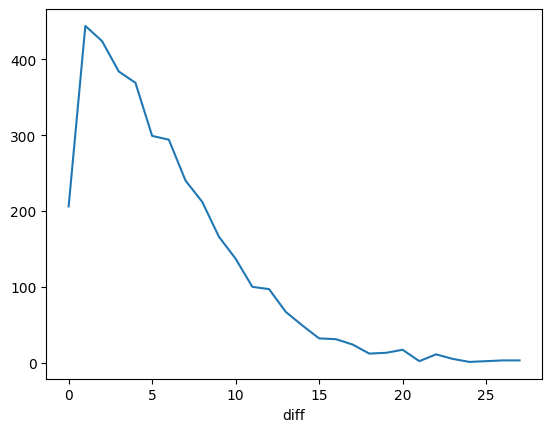

In [ ]:
# To see how many prediction errors we made
predictions["diff"].round().value_counts().sort_index().plot()

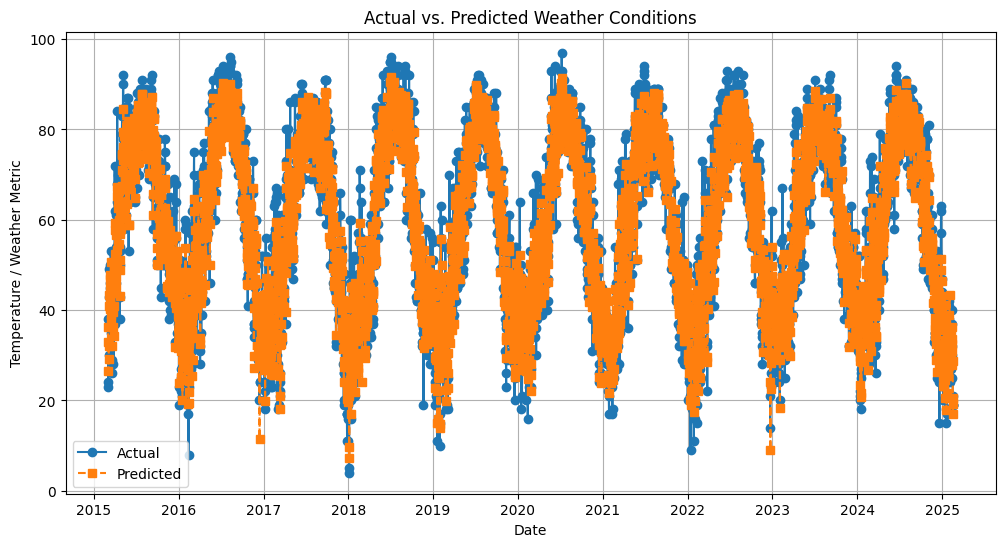

In [ ]:
# final plot to display our temperature prediction over time

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(predictions.index, predictions["actual"], label="Actual", marker='o', linestyle='-')
plt.plot(predictions.index, predictions["prediction"], label="Predicted", marker='s', linestyle='--')

plt.xlabel("Date")
plt.ylabel("Temperature / Weather Metric")
plt.title("Actual vs. Predicted Weather Conditions")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# saved the model so that the user can use it in their locl machines as well
import joblib
# Saved the trained Ridge model below
joblib.dump(rr, "ridge_model.pkl")
print("Model saved as 'ridge_model.pkl'")

Model saved as 'ridge_model.pkl'


In [ ]:
## Demo
del rr

In [ ]:
rr = joblib.load("ridge_model.pkl")
print("Model reloaded from 'ridge_model.pkl'")

Model reloaded from 'ridge_model.pkl'


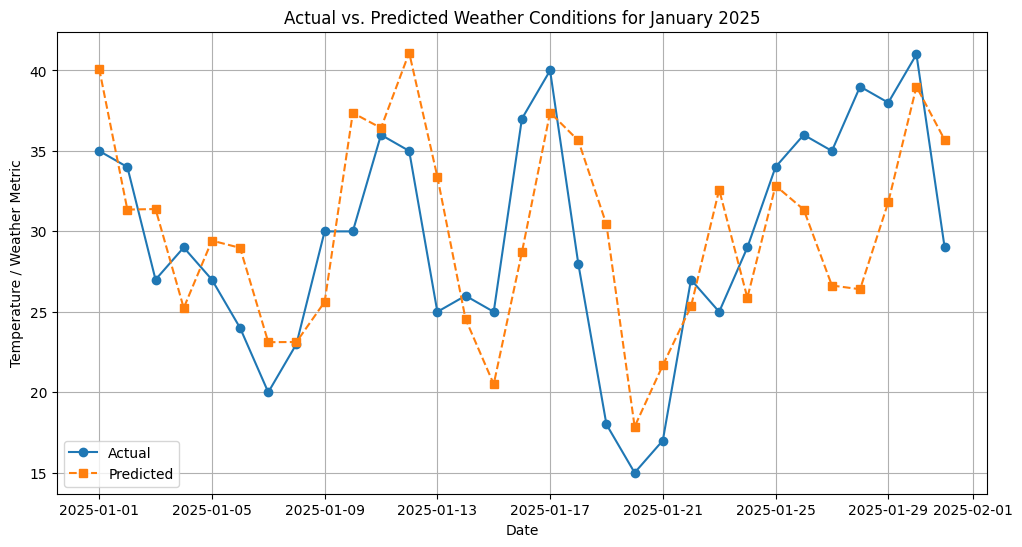

In [ ]:
# Ensure the index is in datetime format
predictions.index = pd.to_datetime(predictions.index)

# Filter for a specific month (e.g., Jan 2025)
predictions_month = predictions.loc["2025-01-01":"2025-01-31"]

# Alternatively, to select the last 30 days of data, you can use:
# predictions_month = predictions.last("30D")

# Plot actual vs. predicted values for the selected month
plt.figure(figsize=(12, 6))
plt.plot(predictions_month.index, predictions_month["actual"], label="Actual", marker='o', linestyle='-')
plt.plot(predictions_month.index, predictions_month["prediction"], label="Predicted", marker='s', linestyle='--')

plt.xlabel("Date")
plt.ylabel("Temperature / Weather Metric")
plt.title("Actual vs. Predicted Weather Conditions for January 2025")
plt.legend()
plt.grid(True)
plt.show()
